


The goal of my Data Set is to observe enrollment in schooling and base the best neighborhood off of the highest enrollment rates. The reasoning for doing this is because the more educated a neighborhood is the better off it becomes, and can lead to more improvements. I used a DataFrame that collected school data from 2016 for neighborhoods in Pittsburgh.

In [14]:
##Importing pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

enrollmentData= pd.read_csv("enrollmentData.csv")
enrollmentData.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000


Since there 40 columns, it would take a long time to type in and delete them so I created a new DataFrame called enrollmentData1. 

In [3]:
##printing the columns that will be used in the obervation
enrollmentData1=enrollmentData[["Neighborhood","Estimate; Enrolled in school:","Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Estimate; Not enrolled in school"]].copy()
enrollmentData1.head(10)


,Neighborhood,Estimate; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Not enrolled in school
0,Allegheny Center,394.0,150.0,995.0
1,Allegheny West,61.0,2.0,282.0
2,Allentown,965.0,125.0,1555.0
3,Arlington,427.0,142.0,1396.0
4,Arlington Heights,40.0,12.0,173.0
5,Banksville,402.0,23.0,3385.0
6,Bedford Dwellings,337.0,24.0,914.0
7,Beechview,1783.0,559.0,5987.0
8,Beltzhoover,342.0,140.0,1267.0
9,Bloomfield,2185.0,693.0,6313.0


I used the columns pulled from the dataFrame to create new columns based off their stats, and then created a ranking system. 

In [9]:
##Adding Estimated Enrolled, to Estimated not enrolled for student total. Then Finding the enrollment Percentage. 
##Adding percentage of students who go on to get a college degree
##Adding a ranking system to the percentages, Low being a bad score, Medium being a average score, and High being a above average score.
def my_function(x):
    if x>.5:
        return("high")
    if x>.3:
        return("medium")
    return("low")

result=enrollmentData1.iloc[:,[1,3]].sum(axis=1)

enrollmentData1["Enrollment Percentage Overall"] = ((enrollmentData1["Estimate; Enrolled in school:"])/result)
enrollmentData1["Enrollment Percentage undergradute degree"] = (enrollmentData1["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"]/result)
enrollmentData1["Enrollment Percentage Overall, high, medium, low"]=enrollmentData1["Enrollment Percentage Overall"].map(my_function)
enrollmentData1["Enrollment Percentage undergraduate status, high, medium, low"]=enrollmentData1["Enrollment Percentage undergradute degree"].map(my_function)


enrollmentData1.head(10)
##Printing Out the First 10







,Neighborhood,Estimate; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Not enrolled in school,Enrollment Percentage Overall,Enrollment Percentage undergradute degree,"Enrollment Percentage Overall, high, medium, low","Enrollment Percentage undergraduate status, high, medium, low"
0,Allegheny Center,394.0,150.0,995.0,0.283657,0.107991,low,low
1,Allegheny West,61.0,2.0,282.0,0.177843,0.005831,low,low
2,Allentown,965.0,125.0,1555.0,0.382937,0.049603,medium,low
3,Arlington,427.0,142.0,1396.0,0.234229,0.077894,low,low
4,Arlington Heights,40.0,12.0,173.0,0.187793,0.056338,low,low
5,Banksville,402.0,23.0,3385.0,0.106153,0.006073,low,low
6,Bedford Dwellings,337.0,24.0,914.0,0.269384,0.019185,low,low
7,Beechview,1783.0,559.0,5987.0,0.229472,0.071943,low,low
8,Beltzhoover,342.0,140.0,1267.0,0.212554,0.087011,low,low
9,Bloomfield,2185.0,693.0,6313.0,0.257119,0.081549,low,low


Now you can see in the new DataFrame that there are 4 more categories, Enrollment Percentage Overall,Enrollment Perentage undergradute degree, and Enrollemnt Percentage rankings systems. I'll now find the Neighborhoods labeled high for undergraduate enrollment.  

In [7]:
##Finding The Neighborhoods labled as high, Undergraduate Enrollment. 
s = enrollmentData1["Enrollment Percentage undergraduate status, high, medium, low"].astype(str)
query_mask = s.str.startswith("high")
High = enrollmentData1[query_mask]
High.head()
##Only looking for all of the neighborhoods who have high undergraduate Enrollment. 

,Neighborhood,Estimate; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Not enrolled in school,Enrollment Percentage Overall,Enrollment Percentage undergradute degree,"Enrollment Percentage Overall, high, medium, low","Enrollment Percentage undergraduate status, high, medium, low"
10,Bluff,3625.0,3376.0,2664.0,0.576403,0.536810,high,high
19,Central Oakland,4656.0,4206.0,1166.0,0.799725,0.722432,high,high
56,North Oakland,7192.0,6123.0,2373.0,0.751908,0.640146,high,high


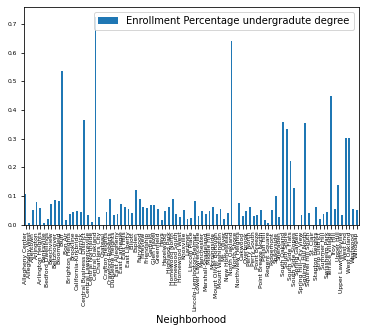

In [12]:
bargraph=enrollmentData1.plot.bar(x="Neighborhood",y="Enrollment Percentage undergradute degree",fontsize='6')

The Graph Represents Enrollment Percentages for Undergraduate Degree. 

In [8]:
##Finding the Neighborhood labeled as high, Overall
enrol = enrollmentData1["Enrollment Percentage Overall, high, medium, low"].astype(str)
t = s.str.startswith("high")
high = enrollmentData1[t]
high.head()
##Only looking for all of the neighborhoods who overall high Enrollment. 

,Neighborhood,Estimate; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Not enrolled in school,Enrollment Percentage Overall,Enrollment Percentage undergradute degree,"Enrollment Percentage Overall, high, medium, low","Enrollment Percentage undergraduate status, high, medium, low"
10,Bluff,3625.0,3376.0,2664.0,0.576403,0.536810,high,high
19,Central Oakland,4656.0,4206.0,1166.0,0.799725,0.722432,high,high
56,North Oakland,7192.0,6123.0,2373.0,0.751908,0.640146,high,high


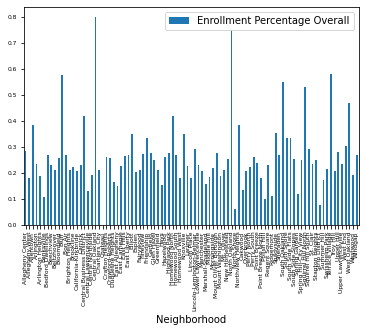

In [13]:
bargraph=enrollmentData1.plot.bar(x="Neighborhood",y="Enrollment Percentage Overall",fontsize='6')

The Graph Represents Enrollment Percentages overall. 

In [18]:
##Finds the max value in the enrollment Percentage collum. 
maxenrollment = enrollmentData1.loc[enrollmentData1["Enrollment Percentage Overall"].idxmax()]
print(maxenrollment)

Neighborhood                                                                Central Oakland
Estimate; Enrolled in school:                                                        4656.0
Estimate; Enrolled in school: - Enrolled in college, undergraduate years             4206.0
Estimate; Not enrolled in school                                                     1166.0
Enrollment Percentage undergradute degree                                          0.722432
Enrollment Percentage undergraduate status, high, medium, low                          high
Enrollment Percentage Overall                                                      0.799725
Enrollment Percentage Overall, high, medium, low                                       high
Name: 19, dtype: object


Central Oakland is the top Overall Percentage or Enrollment.

In [19]:
##FInds the max value in the Undergradute collum. 
maxcollege=enrollmentData1.loc[enrollmentData1["Enrollment Percentage undergradute degree"].idxmax()]
print(maxcollege)


Neighborhood                                                                Central Oakland
Estimate; Enrolled in school:                                                        4656.0
Estimate; Enrolled in school: - Enrolled in college, undergraduate years             4206.0
Estimate; Not enrolled in school                                                     1166.0
Enrollment Percentage undergradute degree                                          0.722432
Enrollment Percentage undergraduate status, high, medium, low                          high
Enrollment Percentage Overall                                                      0.799725
Enrollment Percentage Overall, high, medium, low                                       high
Name: 19, dtype: object


Central Oakland placed first in both categories both categories.

Conclusion- Based off the results of my DataFrame, Central Oakland placed first in both categories, Overall Enrollment, and Undergraduate Enrollment. North Oakland was a close second for both categories, and Bluff was third. 